<a href="https://colab.research.google.com/github/OBB-2199/EscapeEarth/blob/main/Interns/Olivia/Download_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install lightkurve

     |████████████████████████████████| 522kB 6.8MB/s 
     |████████████████████████████████| 6.5MB 7.4MB/s 
     |████████████████████████████████| 25.9MB 1.2MB/s 
     |████████████████████████████████| 256kB 48.3MB/s 
     |████████████████████████████████| 51kB 8.1MB/s 
     |████████████████████████████████| 2.6MB 47.2MB/s 
  Created wheel for astroquery: filename=astroquery-0.4.1-cp36-none-any.whl size=3831873 sha256=dcff833a0ac401e698272fa18a58e1a8ff5d7197e1a77be2a7c012adbb464224
  Stored in directory: /root/.cache/pip/wheels/88/f8/b7/a254cd96e808f708bc0b7d755a8e095c56fbbe94099d7b464f
  Created wheel for oktopus: filename=oktopus-0.1.2-cp36-none-any.whl size=12781 sha256=4d07c53cdcf5f720b28f45424cd589f7c10da69c237173bfd4bd4e955b55d925
  Stored in directory: /root/.cache/pip/wheels/9b/90/81/098fc66ee56166d63c9a8fc0a9672ae7b3423396a588ec952a
  Created wheel for fbpca: filename=fbpca-1.0-cp36-none-any.whl size=11376 sha256=7853eed0c2a737c1dc2dd1574ccac2c11e593f8716e99ce9b6d08c501a

In [2]:
import pandas as pd
import lightkurve as lk
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
sector_14 = pd.read_csv('/content/gdrive/My Drive/EscapeEarthData/all_targets_S014_v1.csv', skiprows=5)
sector_14.head(10) 
#sector_14.tail()

,TICID,Camera,CCD,Tmag,RA,Dec
0,7582594,2,3,8.57,272.3966,45.8308
1,7582633,2,3,9.92,272.3288,45.9244
2,7582634,2,3,10.48,272.3307,45.9255
3,7583285,2,2,11.30,272.3711,47.2259
4,7584049,2,2,8.50,272.5282,47.0887
5,7584971,2,3,8.09,272.5415,45.2208
6,7585322,2,3,8.90,272.5121,44.5446
7,7618785,2,3,5.99,272.7084,44.5982
8,7619197,2,3,8.08,272.7299,45.3263
9,7620704,2,2,5.81,272.8927,47.6596


In [4]:
lcf = lk.search_lightcurvefile('TIC 7582594',mission = 'TESS', sector = 14).download()

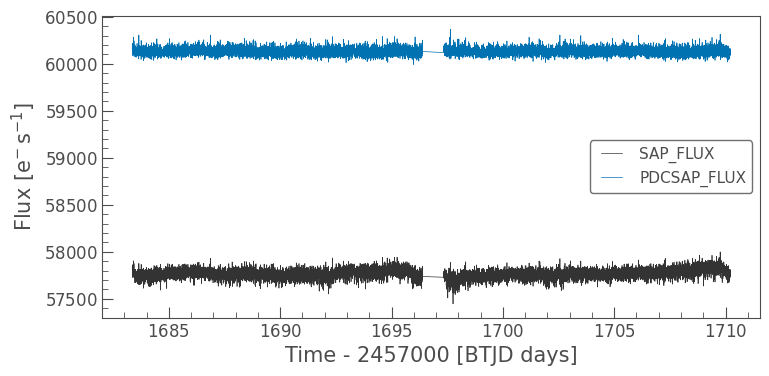

In [5]:
lcf.plot()

In [6]:
for i in sector_14['TICID']:
  TIC = "TIC " + str(i)
  #lcf = lk.search_lightcurvefile(TIC, mission = 'TESS', sector = 14).download()  

In [7]:
def sec14_plot(TICID):
  TIC = "TIC " + str(TICID)
  lcf = lk.search_lightcurvefile(TIC, mission = 'TESS', sector = 14).download()
  graph = lcf.plot()
  return graph

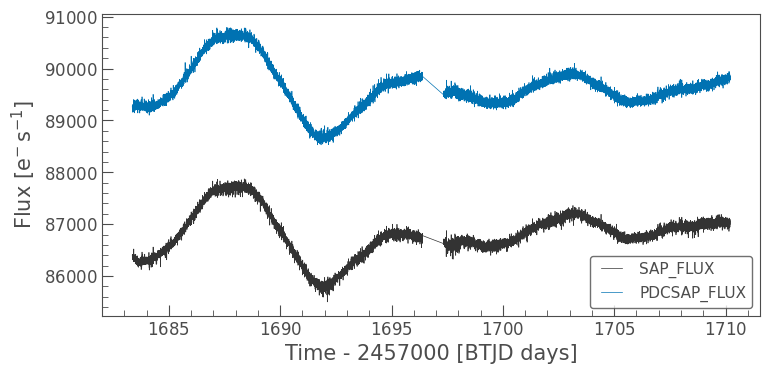

In [8]:
sec14_plot(7584971)

In [9]:
#type(sector_14['TICID'])
TICID = sector_14['TICID'].to_numpy()[0:5]#second num is exclusive

In [14]:
file_path = '/content/gdrive/My Drive/EscapeEarthData/TeamB/'

for i in TICID:
  TIC = "TIC " + str(i)
  #print(TIC)
  lcf = lk.search_lightcurvefile(TIC, mission = 'TESS', sector = 14).download()
  lc = lcf.PDCSAP_FLUX
  print(lc)

TessLightCurve(TICID: 7582594)
TessLightCurve(TICID: 7582633)
TessLightCurve(TICID: 7582634)
TessLightCurve(TICID: 7583285)
TessLightCurve(TICID: 7584049)


In [13]:
lc.to_fits(path = file_path, overwrite=True)

OSError: ignored